# ANIMAL SPEEDS DATA ANALYSIS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
from scipy import stats
from bioinfokit.analys import stat
from scipy.stats import norm
from scipy.stats import f_oneway
from sklearn.linear_model import LinearRegression
sns.set()

In [2]:
dataset = pd.read_csv(r'C:\Users\ss\Documents\Animal_Speeds.csv')

In [3]:
dataset.head()

,Animal,Weight,Movement_Type,Highspeed
0,House sparrow,0.04,flying,46.0
1,Pelican,7.80,flying,65.0
2,Vulture,11.00,flying,88.0
3,Pigeon,0.35,flying,80.0
4,Puffin,0.58,flying,88.0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Animal         159 non-null    object 
 1   Weight         159 non-null    float64
 2   Movement_Type  159 non-null    object 
 3   Highspeed      159 non-null    float64
dtypes: float64(2), object(2)
memory usage: 3.8+ KB


# Exploratory Data Analysis(EDA) and possible Data Transformations
Since the columns "Animal and Movement_Type" are of Object datatype converting into String datatype allows us to perform a proper analysis.

In [5]:
dataset['Animal'].astype("string")

0            House sparrow
1                  Pelican
2                  Vulture
3                   Pigeon
4                   Puffin
              ...         
154    Shortfin mako shark
155      Great white Shark
156           Leopard seal
157          Basking shark
158          Ocean sunfish
Name: Animal, Length: 159, dtype: string

In [6]:
dataset['Movement_Type'].astype("string")

0        flying
1        flying
2        flying
3        flying
4        flying
         ...   
154    swimming
155    swimming
156    swimming
157    swimming
158    swimming
Name: Movement_Type, Length: 159, dtype: string

In [7]:
dataset.isnull().sum()

Animal           0
Weight           0
Movement_Type    0
Highspeed        0
dtype: int64

In [8]:
dataset.describe() #obtaining statistical information

,Weight,Highspeed
count,159.000000,159.000000
mean,1994.115969,52.640881
std,12285.311105,34.460258
min,0.001000,1.500000
25%,2.625000,30.000000
50%,22.000000,48.000000
75%,310.000000,70.000000
max,140000.000000,195.000000


In [9]:
dataset["Movement_Type"].value_counts()

running     78
swimming    41
flying      27
climbing    13
Name: Movement_Type, dtype: int64

In [10]:
# Skewness Function

def skewness(x):
    res = 0 
    m = x.mean()
    s = x.std()
    for i in x:
        res += (i-m) * (i-m) * (i-m)
    res /= (len(x) * s * s * s)
    return res

print (" Skewness of Weight =  ", skewness ( dataset['Weight'] ))
print (" Skewness of Highspeed =  ", skewness ( dataset['Highspeed'] ))

 Skewness of Weight =   9.53606366348767
 Skewness of Highspeed =   1.0447180091747341


(array([ 2.,  0.,  1., 10.,  2.,  3.,  1.,  5.,  0.,  1.,  4., 10.,  5.,
         1.,  1., 13.,  0.,  0.,  1., 11.,  5.,  0.,  7.,  7.,  1.,  4.,
         1.,  7.,  0.,  1.,  3.,  1.,  0.,  1.,  0., 12.,  0.,  0.,  0.,
         4.,  2.,  0.,  0.,  4.,  2.,  1.,  0.,  1.,  0.,  0.,  2.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  1.,  1.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.]),
 array([ 10,  12,  14,  16,  18,  20,  22,  24,  26,  28,  30,  32,  34,
         36,  38,  40,  42,  44,  46,  48,  50,  52,  54,  56,  58,  60,
         62,  64,  66,  68,  70,  72,  74,  76,  78,  80,  82,  84,  86,
         88,  90,  92,  94,  96,  98, 100, 102, 104, 106, 108, 110, 112,
        114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136, 138,
        140, 142, 144, 146, 148, 150, 152, 154, 156, 158, 160, 162, 164,
        166, 168, 170, 172

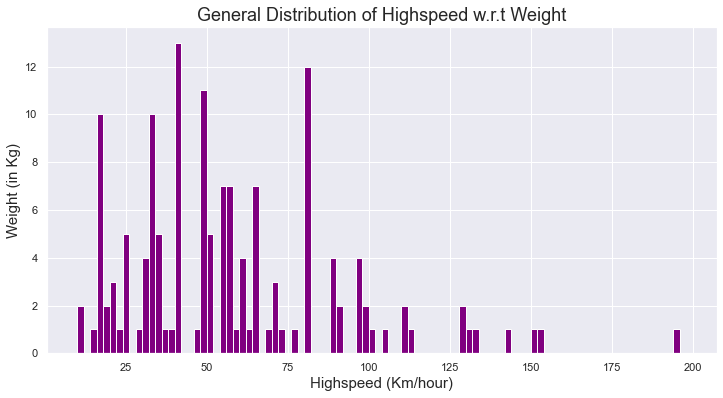

In [11]:
plt.figure(figsize=(12, 6))
plt.title('General Distribution of Highspeed w.r.t Weight',size=18)
plt.xlabel('Highspeed (Km/hour)',size=15)
plt.ylabel('Weight (in Kg)',size=15)
plt.hist(dataset.Highspeed, bins=np.arange(10,200,2), color='purple')

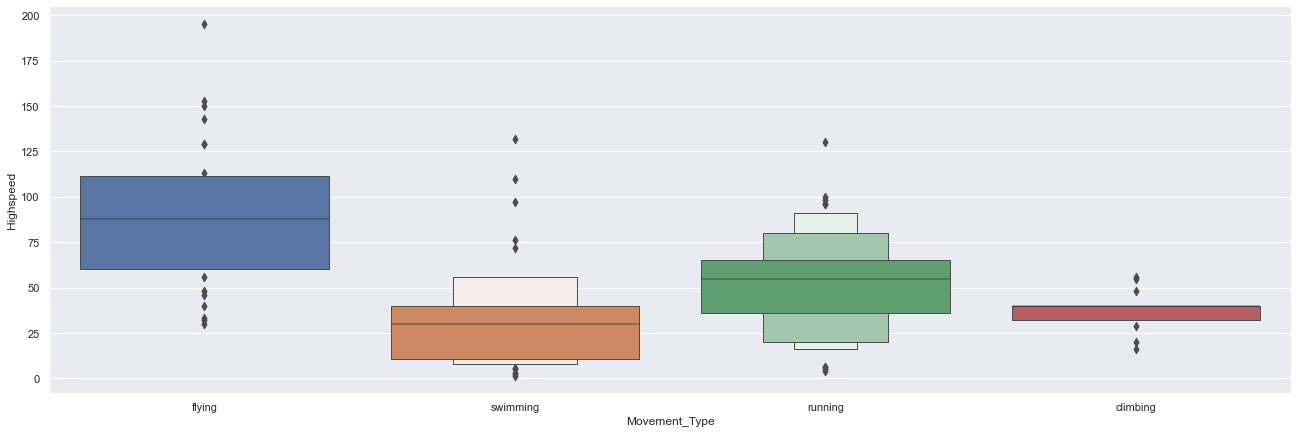

In [12]:
# Movement_Type vs Highspeed
sns.catplot(y = "Highspeed", x = "Movement_Type", data = dataset.sort_values("Highspeed", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

# a) Detailed Descriptive Analysis of the data set.

In [13]:
groupby_m = dataset.groupby(['Movement_Type']).mean() 
groupby_v = dataset.groupby(['Movement_Type']).var()
groupby_s = dataset.groupby(['Movement_Type']).std()

#By this we knew in a descriptive way how avg weight influences highspeed
print('MEAN values of weight and highspeed with respect to Movement Type:' + str(groupby_m)) 
print('VARIENCE of weight and highspeed with respect to Movement Type:' + str(groupby_v))
print('STANDARD DEVIATION of weight and highspeed with respect to Movement Type:' + str(groupby_s))

MEAN values of weight and highspeed with respect to Movement Type:                    Weight  Highspeed
Movement_Type                        
climbing         40.285000  36.923077
flying            6.290704  90.259259
running         295.632577  52.582051
swimming       7153.940098  32.963415
VARIENCE of weight and highspeed with respect to Movement Type:                     Weight    Highspeed
Movement_Type                           
climbing       3.774053e+03   142.576923
flying         8.961863e+01  1707.660969
running        5.248597e+05   642.112141
swimming       5.583348e+08   869.441878
STANDARD DEVIATION of weight and highspeed with respect to Movement Type:                     Weight  Highspeed
Movement_Type                         
climbing          61.433320  11.940558
flying             9.466712  41.323855
running          724.472048  25.339932
swimming       23629.108246  29.486300


It is also clear from above statistical analysis that,the intuition larger animals are generally faster than smaller animals is FALSE.
The heaviest animals are not the fastest ones, instead the lower the avg.weight the higher is the highspeed. They are negative coefficients.

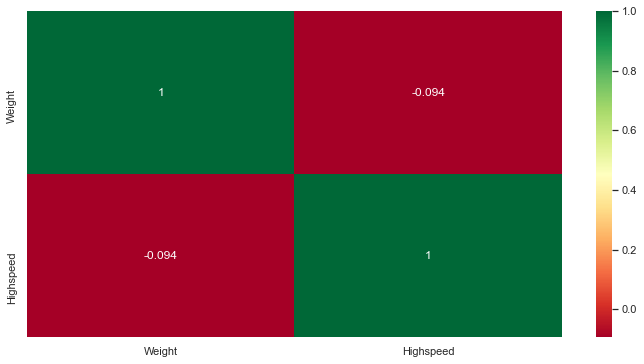

In [14]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (12,6))
sns.heatmap(dataset.corr(), annot = True, cmap = "RdYlGn")

plt.show()

Text(0, 0.5, 'Weight (in Kg)')

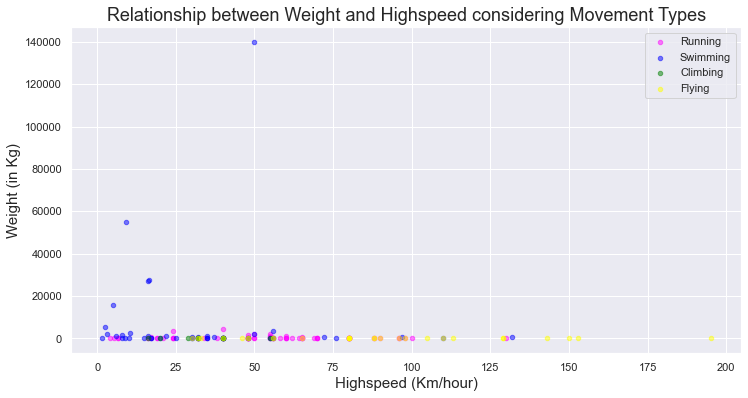

In [15]:
# Scatter plot of Weight and Highspeed

ax1 = dataset[dataset['Movement_Type'] == 'running'].plot(kind='scatter', x='Highspeed', y='Weight', color='magenta', alpha=0.5, figsize=(12, 6))
dataset[dataset['Movement_Type'] == 'swimming'].plot(kind='scatter', x='Highspeed', y='Weight', color='blue', alpha=0.5, figsize=(12 ,6), ax=ax1)
dataset[dataset['Movement_Type'] == 'climbing'].plot(kind='scatter', x='Highspeed', y='Weight', color='green', alpha=0.5, figsize=(12 ,6), ax=ax1)
dataset[dataset['Movement_Type'] == 'flying'].plot(kind='scatter', x='Highspeed', y='Weight', color='yellow', alpha=0.5, figsize=(12 ,6), ax=ax1)
plt.legend(labels=['Running', 'Swimming', 'Climbing', 'Flying'])
plt.title('Relationship between Weight and Highspeed considering Movement Types', size=18)
plt.xlabel('Highspeed (Km/hour)',size=15)
plt.ylabel('Weight (in Kg)',size=15)

This scatterplot clearly shows that the coefficients have a negative linear relationship with eachother,i.e If weight increases highspeed decreases and vice versa.

# b) Performing Linear Regresssion with scatter plot to analyze relationship between Weight and Highspeed taking into account covariable Movement Type

In [16]:
df_running = dataset[dataset['Movement_Type'] == 'running']
df_swimming = dataset[dataset['Movement_Type'] == 'swimming']
df_flying = dataset[dataset['Movement_Type'] == 'flying']
df_climbing = dataset[dataset['Movement_Type'] == 'climbing']

# polynomial
run_fit = np.polyfit(df_running.Highspeed, df_running.Weight, 1)
swim_fit = np.polyfit(df_swimming.Highspeed, df_swimming.Weight, 1)
fly_fit = np.polyfit(df_flying.Highspeed, df_flying.Weight, 1)
climb_fit = np.polyfit(df_climbing.Highspeed, df_climbing.Weight, 1)
print(run_fit)
print(swim_fit)
print(fly_fit)
print(climb_fit)


[ -2.31764338 417.49902019]
[ -11.00190739 7516.60053255]
[-0.02355144  8.4164396 ]
[ 0.05830771 38.13210008]


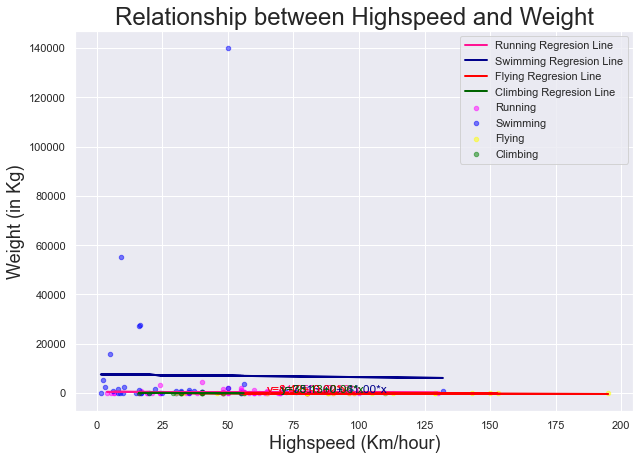

In [17]:
# scatter plots and regression lines

df_running = dataset[dataset['Movement_Type'] == 'running']
df_swimming = dataset[dataset['Movement_Type'] == 'swimming']
df_flying = dataset[dataset['Movement_Type'] == 'flying']
df_climbing = dataset[dataset['Movement_Type'] == 'climbing']

# Scatter plots.
ax1 = df_running.plot(kind='scatter', x='Highspeed', y='Weight', color='magenta', alpha=0.5, figsize=(10, 7))
df_swimming.plot(kind='scatter', x='Highspeed', y='Weight', color='blue', alpha=0.5, figsize=(10, 7), ax=ax1)
df_flying.plot(kind='scatter', x='Highspeed', y='Weight', color='yellow', alpha=0.5, figsize=(10, 7), ax=ax1)
df_climbing.plot(kind='scatter', x='Highspeed', y='Weight', color='green', alpha=0.5, figsize=(10, 7), ax=ax1)

# regression lines
plt.plot(df_running.Highspeed, run_fit[0] * df_running.Highspeed + run_fit[1], color='deeppink', linewidth=2)
plt.plot(df_swimming.Highspeed, swim_fit[0] * df_swimming.Highspeed + swim_fit[1], color='darkblue', linewidth=2)
plt.plot(df_flying.Highspeed, run_fit[0] * df_flying.Highspeed + fly_fit[1], color='red', linewidth=2)
plt.plot(df_climbing.Highspeed, run_fit[0] * df_climbing.Highspeed + climb_fit[1], color='darkgreen', linewidth=2)

# regression equations
plt.text(65, 230, 'y={:.2f}+{:.2f}*x'.format(run_fit[1], run_fit[0]), color='deeppink', size=12)
plt.text(70, 130, 'y={:.2f}+{:.2f}*x'.format(swim_fit[1], swim_fit[0]), color='darkblue', size=12)
plt.text(65, 230, 'y={:.2f}+{:.2f}*x'.format(fly_fit[1], fly_fit[0]), color='red', size=12)
plt.text(70, 130, 'y={:.2f}+{:.2f}*x'.format(climb_fit[1], climb_fit[0]), color='darkgreen', size=12)

# legend, title and labels.
plt.legend(labels=['Running Regresion Line', 'Swimming Regresion Line', 'Flying Regresion Line', 'Climbing Regresion Line','Running', 'Swimming','Flying','Climbing'])
plt.title('Relationship between Highspeed and Weight', size=24)
plt.xlabel('Highspeed (Km/hour)',size=18)
plt.ylabel('Weight (in Kg)',size=18);

# 1) As to perform Multiple Linear Regression we need to Handle Categorical Data 
# 2) Interpreting the coefficients of Linear Model

In [18]:
# As Movement_Type is Nominal Categorical data we will perform OneHotEncoding

mt = dataset[["Movement_Type"]]
mt = pd.get_dummies(mt)
mt.head()

,Movement_Type_climbing,Movement_Type_flying,Movement_Type_running,Movement_Type_swimming
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [19]:
# Concatenate dataframe --> dataset + mt

data = pd.concat([dataset, mt], axis = 1)
data.head()

,Animal,Weight,Movement_Type,Highspeed,Movement_Type_climbing,Movement_Type_flying,Movement_Type_running,Movement_Type_swimming
0,House sparrow,0.04,flying,46.0,0,1,0,0
1,Pelican,7.80,flying,65.0,0,1,0,0
2,Vulture,11.00,flying,88.0,0,1,0,0
3,Pigeon,0.35,flying,80.0,0,1,0,0
4,Puffin,0.58,flying,88.0,0,1,0,0


In [20]:
# create linear regression object
mlr = LinearRegression()

# fit linear regression
mlr.fit(data[['Weight', 'Movement_Type_climbing']], data['Highspeed'])
#mlr.fit(data[['Weight', 'Movement_Type_flying']], data['Highspeed'])
#mlr.fit(data[['Weight', 'Movement_Type_running']], data['Highspeed'])
#mlr.fit(data[['Weight', 'Movement_Type_swimming']], data['Highspeed'])

# get the slope and intercept of the line best fit.
print(mlr.intercept_)

print(mlr.coef_)

54.65164887042415
[-2.81924964e-04 -1.77172146e+01]


In [21]:
mlr.fit(data[['Weight', 'Movement_Type_flying']], data['Highspeed'])
print(mlr.intercept_)
print(mlr.coef_)

45.33498830833482
[-1.61941725e-04  4.49252897e+01]


In [22]:
mlr.fit(data[['Weight', 'Movement_Type_running']], data['Highspeed'])
print(mlr.intercept_)
print(mlr.coef_)

53.67272737725616
[-2.68671932e-04 -1.01124792e+00]


In [23]:
mlr.fit(data[['Weight', 'Movement_Type_swimming']], data['Highspeed'])
print(mlr.intercept_)
print(mlr.coef_)

59.483937313252405
[-2.96638773e-05 -2.63083091e+01]


# Calculating Pearson Corelation Coefficient

In [24]:
# dataframes containing movement type
df_run = data[data['Movement_Type'] == 'running']
df_swim = data[data['Movement_Type'] == 'swimming']
df_fly = data[data['Movement_Type'] == 'flying']
df_climb = data[data['Movement_Type'] == 'climbing']

# pearson correlation coefficient and p-value
pearson_coef, p_value = stats.pearsonr(df_run.Weight, df_run.Highspeed)
print(pearson_coef)

# pearson correlation coefficient and p-value
pearson_coef, p_value = stats.pearsonr(df_swim.Weight, df_swim.Highspeed)
print(pearson_coef)

# pearson correlation coefficient and p-value
pearson_coef, p_value = stats.pearsonr(df_fly.Weight, df_fly.Highspeed)
print(pearson_coef)

# pearson correlation coefficient and p-value
pearson_coef, p_value = stats.pearsonr(df_climb.Weight, df_climb.Highspeed)
print(pearson_coef)

-0.08106444591487529
-0.013729064027144262
-0.102806176144271
0.011333044318740729
